# Анализ популярных игр для интернет-магазина

1. [Цели и задачи исследования](#goal)
2. [Знакомство с данными](#overview)
    * [Выводы](#overview-sum)
3. [Предобработка данных](#preprocessing)
    * [Обработка дубликатов](#duplicate)
    * [Обработка пропусков](#missing)
    * [Замена типа данных](#type)
    * [Обработка аномальных значений](#anomaly)
    * [Расчет на имеющихся данных](#calc)
    * [Выводы](#3_sum)
4. [Анализ данных](#analysis)
    * [Распределение игр по году выпуска](#analysis1)
    * [Платформы с наибольшими суммарными продажами](#analysis2)
    * [Выбор актуального периода](#analysis3)
    * [Анализ потенциально прибыльных платформ](#analysis4)
    * [Диаграмма размаха по глобальным продажам игр](#analysis5)
    * [Зависимость между продажами и оценками пользователей и критиков](#analysis6)
    * [Распределение игр по жанрам](#analysis7)
    * [Выводы](#4_sum)
5. [Описание пользователей каждого региона](#region)
    * [Топ-5 популярных платформ](#5_platform)
    * [Топ-5 популярных жанров](#5_genre)
    * [Влияние рейтинга ESRB на продажи игр в отдельных регионах](#esrb)
    * [Выводы](#5_sum)
6. [Проверка гипотез](#hyp)
    * [Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC](#hyp1)
    * [Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports](#hyp2)
    * [Гипотеза о различии среднего количества продаж для жанров Action и Shooter](#hyp3)
    * [Выводы](#6_sum)
7. [Общий вывод](#total)
    * [Рекомендации для бизнеса](#rec)

## Цели и задачи исследования 
<a id="goal"></a>

В нашем распоряжении &mdash; исторические данные о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 

Мы хотим понять, что определяет успешность игры. Результаты исследования будут использованы магазином игр, чтобы выбрать успешный продукт для продвижения и запустить рекламу.

\* _По условиям задачи, сейчас 2016 год._

**При подготовке данных:**

- Найти пропуски в значениях и заполнить, если это возможно/необходимо
- Найти и устранить дубликаты
- Выявить и убрать редкие и выбивающиеся значения
- Заменить тип данных на корректный, если необходимо


**При анализе данных:**

- Изучить динамику продаж по платформам и выбрать несколько потенциально прибыльных платформ
- Выбрать актуальный период, чтобы сделать прогноз на следующий 2017 год
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, и сравнить ситуацию с другими платформами 
- Составить портрет пользователя: определить топ-5 популярных платформ и топ-5 жанров для каждого региона (Северная Америка, Европа, Япония)
- Проверить рабочие гипотезы

**В качестве рабочих гипотез выдвинем следующие:**

- Оценки пользователей напрямую влияют на решение о покупке: чем выше рейтинг, чем больше продажи
- Пользовательские рейтинги платформ *Xbox One* и *PC* одинаковы
- Пользовательские рейтинги жанров *Action* и *Sports* различаются

## Знакомство с данными
<a id="overview"></a>

Сначала импортируем библиотеки и загрузим таблицу с данными.

In [1]:
#импорт базовых библиотек
import pandas as pd
import numpy as np

from scipy import stats as st

#импорт библиотек визуализации
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим данные
data = pd.read_csv('datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Таблица содержит данные о продажах игр в 4 разных регионах за несколько десятилетий, начиная с 1980-х. Приблизительно эти данные можно сгруппировать следующим образом:

- информация о самой игре (платформа, год выпуска, жанр, возрастная категория от ESRB)
- информация о продажах по регионам (в млн копий)
- рейтинг критиков и пользователей

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим, сколько уникальных игр, жанров и платформ
print('Уникальных игр:', data.Name.nunique())
print('Уникальных жанров:', data.Genre.nunique())
print('Уникальных платформ:', data.Platform.nunique())

Уникальных игр: 11559
Уникальных жанров: 12
Уникальных платформ: 31


При общем размере таблицы в 16 тысяч строк у нас 11 тысяч различных игр (возможны дубликаты в названиях, но тенденция понятна). Зато количество жанров и платформ относительно невелико &mdash; 12 и 31 соответственно.

Значит, предстоит анализировать не отдельные наименования, а **категории игр** &mdash; жанры и платформы, а также их популярность в отдельных регионах.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Выводы
<a id="overview-sum"></a>

Таблица в 16 тысяч строк содержит описание игр (год выпуска, жанр и т.п.), информацию о продажах каждой игры в 4 регионах и рейтинги игр. Самые старые данные датируются 1980 годом, самые свежие &mdash; 2016.

В числе наблюдений можно отметить:

- Пропуски в столбце с годом выпуска и жанром &mdash; вероятно, случайные.
- Множество пропусков в столбце с пользовательской оценкой и оценкой критиков (отсутствует в 50% случаев) &mdash; скорее всего, оценка просто отсутствует по объективным причинам (не найдена информация из-за того, что игра устарела, игра вообще не оценивалась, критики не успели оценить и т.п.).
- Пропуски в столбце с рейтингом ESRB, также многочисленные &mdash; могут объясняться тем, что организация была создана только в 1994 году и не проводила оценку более ранних игр.
- Некорректные типы данных в столбцах `User_Score` и `Year_of_Release`: в первом случае строчный тип, во втором float.
- Большое количество "нулевых" продаж для некоторых игр (до четверти в Северной Америке и Европе, до половины в Японии) &mdash; может объясняться тем, что некоторые игры лицензировались не для всех регионов. А может, просто очень низкие продажи (в миллионах копий), поэтому отображаются нули?
- Все строчные данные (жанры, платформы, названия игр) лучше привести к нижнему регистру, чтобы уменьшить вероятность появления дубликатов

## Предобработка данных
<a id="preprocessing"></a>

Для начала немного причешем таблицу. Во-первых, приведем названия столбцов к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()

Во-вторых, для удобства работы выборочно переименуем столбцы.

In [8]:
data = (data.rename(columns={"year_of_release": "release_year",
                            "rating": "esrb_rating" 
                            })
       )
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Технический момент - отключим автоскролл в ячейках, пригодится на будущее.

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<a id="duplicate"></a>
### Обработка дубликатов

Нас интересовали названия жанров и платформ. Выведем списки уникальных значений для этих столбцов.

In [10]:
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Судя по всему, в наших списках уникальных значений нет дубликатов ни для жанров, ни для платформ. Правда, в жанрах есть пропуск, с ним будем разбираться.

Также убедимся, что в таблице нет полных дубликатов.

In [12]:
data.duplicated().sum()

0

### Обработка пропусков
<a id="missing"></a>

Выведем количество пропусков во всех столбцах.

In [13]:
data.isnull().sum()

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
dtype: int64

Для начала посмотрим на строки с пропущенными названиями игр. Их всего две.

In [14]:
data.query('name.isna()', engine='python')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что здесь же отсутствует название жанра, так что восстановить эти данные шансов мало. Удалим эти строки, потеря небольшая.

In [15]:
data.dropna(subset = ['name'], inplace=True)
data=data.reset_index(drop=True)
print('Пропусков после:', data['name'].isna().sum())

Пропусков после: 0


Посмотрим, есть ли какая-либо связь между 3 столбцами, в которых больше всего пропусков: оценкой критиков, пользовательской оценкой и рейтингом ESRB. Нагляднее всего сделать это при помощи тепловой карты из библиотеки seaborn.

Темный фон &mdash; заполненные значения, белые полосы &mdash; пропуски.

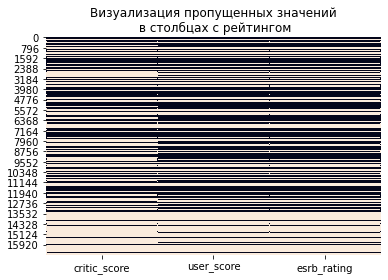

In [16]:
sns.heatmap(data[['critic_score', 'user_score', 'esrb_rating']].isnull(), cbar=False)
plt.title('Визуализация пропущенных значений\n в столбцах с рейтингом')
plt.show()

Получился своеобразный "штрихкод". Два столбца справа имеют практически идентичную раскраску. Значит, где пропущен `user_score`, там же будет пропуск в `esrb_rating`. 

Проверим, так ли это, посмотрев на перечень уникальных значений `esrb_rating` в тех случаях, когда есть пропуск в `user_score`.

In [17]:
data.query('user_score.isna()', engine='python').esrb_rating.value_counts(dropna=False)

NaN     6628
E         40
T         20
E10+       7
M          3
RP         1
Name: esrb_rating, dtype: int64

Предположение подтвердилось. Сделаем аналогично для пары столбцов `critic_score` и `user_score`.

In [18]:
data.query('critic_score.isna()', engine='python').user_score.value_counts(dropna=False)

NaN    6661
tbd    1342
7.8      26
7        24
8        23
       ... 
0.6       1
9.3       1
1.7       1
9.7       1
9.5       1
Name: user_score, Length: 86, dtype: int64

И эти множества _практически полностью пересекаются:_ на 6600 пустых оценок критиков приходятся пропуски в пользовательской оценке и еще 1300 строк заполнены значением-заглушкой tbd ('to be determined').

Что же, может быть дело в низкой популярности этих игр &mdash; никто их не покупает и никто не оценивает? Посмотрим на суммарные продажи игр, для которых нет рейтинга критиков.

In [19]:
data.query('critic_score.isna()', engine='python')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

na_sales       1528.37
eu_sales        729.11
jp_sales        849.58
other_sales     201.84
dtype: float64

Нет, на низкую популярность не похоже &mdash; продажи этих позиций есть, в Северной Америке даже довольно существенные. 

Учитывая совпадения пропусков в трех столбцах, предположим, что оценки были, но примерно в половине случаев потерялись при парсинге исторических данных. Тогда лучше обратиться к разработчикам, которые делали для нас эту выгрузку. 

Итак, мы обнаружили определенную закономерность. Пропуски в 3-х столбцах (`user_score`, `critic_score`, `esrb_rating`) во многом пересекаются, что похоже на случай MNAR (неслучайные пропуски). Рейтинги с количественной оценкой (`user_score`, `critic_score`) мы не будем заполнять ни нулями, ни медианой, так как рискуем исказить данные.

А вот рейтинг ESRB - категориальный, поэтому мы можем заменить пропуски новой категорией _undefined_. Это также позволит понять, по какому региону какая доля игр осталась без рейтинга. 

Выполним замену.

In [20]:
data['esrb_rating'] = data['esrb_rating'].fillna('undefined')

Что касается значений 'tbd' в пользовательском рейтинге, заменим эти записи на NaN. Восстановить их не получится, а удалять нехорошо &mdash; слишком много данных утратим.

In [21]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

Также у нас есть пропуски в годе выпуска игр. У нас нет хорошего способа восстановить их. 

Можно было бы посмотреть, когда эта же игра выпускалась на других платформах, но тут мы рискуем совершить ошибку, так как не всегда это происходило одновременно. Поэтому строки с играми, для которых неизвестен год, мы удалим. Их не так много, около 1% от общего количества. 

In [22]:
data.dropna(subset = ['release_year'], inplace=True)
data=data.reset_index(drop=True)
print('Пропусков после:', data['release_year'].isna().sum())

Пропусков после: 0


In [23]:
# выполним финальную проверку количества пропусков
data.isnull().sum()

name               0
platform           0
release_year       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      8981
esrb_rating        0
dtype: int64

### Замена типа данных
<a id="type"></a>

Преобразуем год выпуска в целочисленный тип данных. Далее проверим, как прошла замена.

In [24]:
data = data.astype(
    {'release_year': int
    }
)

In [25]:
data.dtypes

name             object
platform         object
release_year      int32
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score      float64
esrb_rating      object
dtype: object

In [26]:
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


### Обработка аномальных значений
<a id="anomaly"></a>

Теперь, когда мы привели данные к корректному типу, можно проверить таблицу на наличие аномальных значений. 

In [27]:
data.describe()

,release_year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Значения продаж колеблются от 0 до 41 млн копий. Год выпуска &mdash; от 1980 до 2016. Что касается рейтингов, то и они находятся в заданных рамках: максимальная оценка критиков &mdash; 98, а пользователей &mdash; 9.7, что выглядит реалистично.

Отрицательных значений нет и в целом значения выглядят корректно, поэтому пойдем дальше.

### Расчет на имеющихся данных
<a id="calc"></a>

Для каждой игры на каждой платформе сосчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец `total_sales`. 

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


<a id="3_sum"></a>
### Выводы

- Мы привели названия столбцов таблицы к нижнему регистру и выборочно переименовали несколько из них
- Убедились, что в таблице отсутствуют полные дубликаты
- Аномальных значений не обнаружили
- Удалили строки с пропусками в названии игры и жанра &mdash; их было очень мало, и мы ничего на этом не потеряли
- Обнаружили, что существует множество совпадений в пропусках в 3 столбцах &mdash; с оценкой критиков, пользовательской оценкой и рейтингом ESRB. Это позволило предположить, что проблема здесь в выгрузке. Пропуски в оценках решили не заполнять, а строки не удалять, так как их слишком много (до 50%). Пропуски в рейтинге ESRB заполнили индикатором `undefined`, далее посмотрим, как они распределились по сравнению с другими категориями.
- Пропуски в годе выпуска игр решили не восстанавливать, так как не нашли хорошего способа сделать это достоверно. Строки с пропусками удалили
- Привели данные к корректному типу: год сделали целочисленным, а пользовательский рейтинг &mdash; float
- Добавили новый столбец с общей суммой продаж по всем регионам

<a id="analysis"></a>
## Анализ данных

<a id="analysis1"></a>
### Распределение игр по году выпуска

Наша статистика охватывает целых 37 лет &mdash; с 1980 по 2016 годы. Можно ожидать, что в какие-то периоды будет всплеск популярности, и соответственно больше игр, а в другие &mdash; меньше. Посмотрим, как распределяются игры по году выпуска.

In [29]:
games_by_year = data.pivot_table(index='release_year', values='name', aggfunc='count')

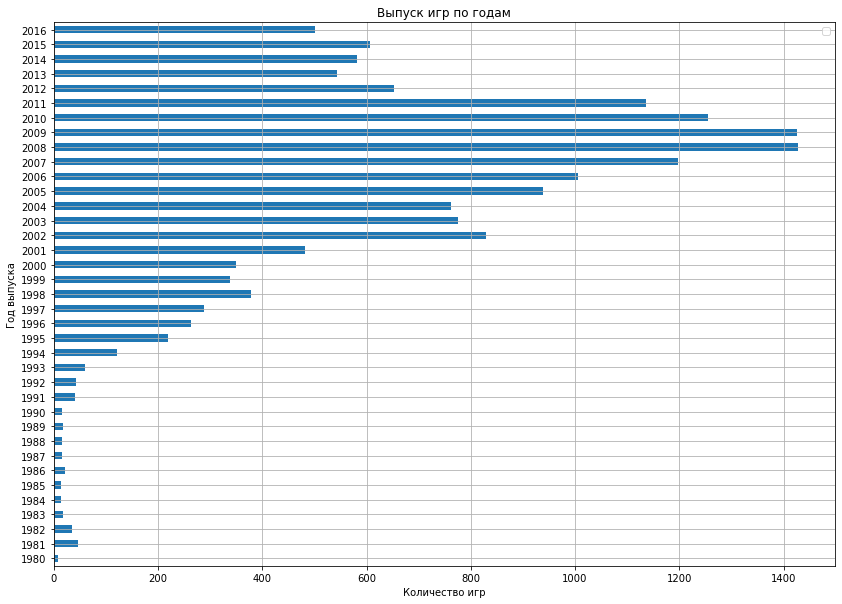

In [30]:
games_by_year.plot(kind='barh', figsize=(14, 10), grid=True)
plt.legend('_Hidden label')
plt.title('Выпуск игр по годам')
plt.ylabel('Год выпуска')
plt.xlabel('Количество игр')
plt.show()

Судя по графику, бум компьютерных игр наблюдался **с 2002 по 2012 годы** (максимум &mdash; полторы тысячи игр в год!), а до середины девяностых все было достаточно тихо (не более 200 игр в год). 

После 2008-2009 количество выпускаемых игр пошло на спад. Вероятно, рынок насытился играми среднего качества, конкуренция выросла, и производители стали стремиться выпускать более качественный и интересный продукт. Из-за этого разработка игр стала стоить дороже и занимать больше времени.

Скорее всего, рассматривать данные как минимум до 2000-х для нас не имеет смысла. Соображений здесь два:

- Рынок очень сильно изменился. Раньше конкурировали десятки игр, в последнее время &mdash; сотни и тысячи. Строить по таким старым данным прогноз на будущее можно, но картина будет искажена.
- Выводы по 80-м, 90-м и нулевым годам будут сильно отличаться из-за различного объема выборок.

<a id="analysis2"></a>
### Платформы с наибольшими суммарными продажами

Посмотрим, какие платформы самые популярные у пользователей. Сделаем сводную таблицу, в которой просуммируем продажи по каждой платформе и выведем топ-5.

In [31]:
top5 = (data.pivot_table
        (index='platform', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending=False)
        .head()
       )
display(top5)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Итак, мы определили топ-5 лидеров продаж за всё время. Изучим, как для них менялись продажи с течением времени. Это поможет определить популярные платформы, чтобы продвигать их в нашей рекламной кампании.

Сделаем срез данных из нашей таблицы по списку лидеров из переменной `platform_top5`. Затем построим сводную таблицу, просуммировав продажи по годам. Год продажи нам неизвестен, поэтому возьмем год выпуска.

In [32]:
top5_data = (data.query('platform in @top5.index')
                      .pivot_table(
                          index='release_year', 
                          columns='platform', 
                          values='total_sales', 
                          aggfunc='sum')
            )
top5_data.head()

platform,DS,PS2,PS3,Wii,X360
release_year,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN


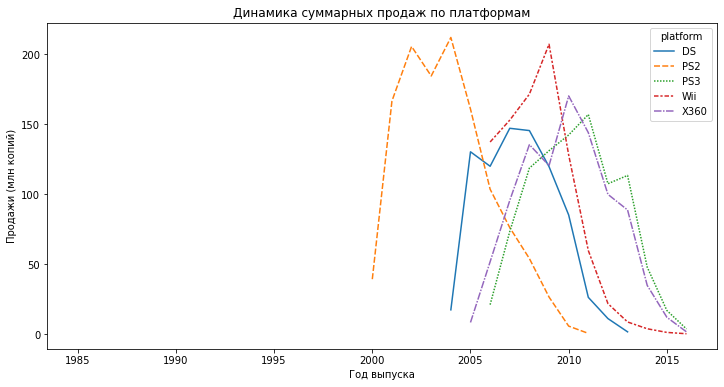

In [33]:
plt.figure(figsize = (12,6))
sns.lineplot(data=top5_data)
plt.title('Динамика суммарных продаж по платформам')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Год выпуска')
plt.show()

Для каждой платформы видим четкие пики и спады. В среднем жизненный цикл платформы составляет около 10 лет: для PS2 &mdash; с 2000 по 2010, для Wii, X360 и PS3 &mdash; с 2005-2006 по 2016 год. Пики продаж выглядят немного по-разному, но в общем и целом приходятся на 3-5 годы с начала выпуска консоли.

На общем фоне выделяется только платформа  DS с непонятно откуда взявшимися продажами в 1985 году. Странно, ведь платформа Nintendo DS появилась только в 2004 году. Посмотрим подробнее на данные.

In [34]:
data.query('release_year == 1985 and platform == "DS"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Продажи только в Японии, игра всего одна. Похоже, это какая-то ранняя игра Nintendo, которую можно не учитывать.

Тогда жизненный цикл для DS тоже составит около 10 лет &mdash; с 2004 по 2013 год.

Сейчас мы смотрим только топ-5 популярных платформ. Возможно, для других платформ и картина иная. Сгруппируем все наши данные по платформам и найдем разницу между максимальным и минимальным годом релиза. Далее вычислим медиану.

In [35]:
# группируем данные по платформе и находим продолжительность жизни
game_lifecycle = (data.groupby('platform')['release_year'].max()
                  -data.groupby('platform')['release_year'].min()
                 )

print('Средний период жизни платформы', int(game_lifecycle.mean()),'лет')

Средний период жизни платформы 7 лет


Действительно, в среднем для платформ и срок жизни поменьше. Видимо, платформы из топа-5 держатся так долго как раз в силу своей популярности.

<a id="analysis3"></a>
### Выбор актуального периода

Наша задача &mdash; составить прогноз на 2017 год. Теперь мы точно знаем, что брать очень старые данные смысла нет: платформы появляются и сходят со сцены за 7-10 лет.

Хорошо бы понять, игры каких платформ сейчас на пике популярности или, точнее, будут на пике в следующем году. Судя по графику, бурный рост платформ начинается приблизительно через 3 года после выхода на рынок и держится пару лет, после чего идет на спад.

В таком случае, возьмем данные за последние 5 лет, то есть с 2012 по 2016 годы. Это не слишком много и не мало и позволит понять, чего можно ожидать в 2017 году.

Сделаем срез данных по году выпуска и сохраним его в новый фрейм `newdata`.

In [36]:
newdata = data.query('release_year >= 2012').reset_index(drop=True)
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2886 non-null   object 
 1   platform      2886 non-null   object 
 2   release_year  2886 non-null   int32  
 3   genre         2886 non-null   object 
 4   na_sales      2886 non-null   float64
 5   eu_sales      2886 non-null   float64
 6   jp_sales      2886 non-null   float64
 7   other_sales   2886 non-null   float64
 8   critic_score  1312 non-null   float64
 9   user_score    1531 non-null   float64
 10  esrb_rating   2886 non-null   object 
 11  total_sales   2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 259.4+ KB


<a id="analysis4"></a>
### Анализ потенциально прибыльных платформ

Аналогично тому, как мы делали ранее для _всех платформ за все время,_ построим сводную таблицу с суммой продаж _по всем платформам за последние пять лет_. Затем выведем данные на график.

In [37]:
recent = (newdata.pivot_table(
                          index='release_year', 
                          columns='platform', 
                          values='total_sales', 
                          aggfunc='sum')
         )
recent.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
release_year,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


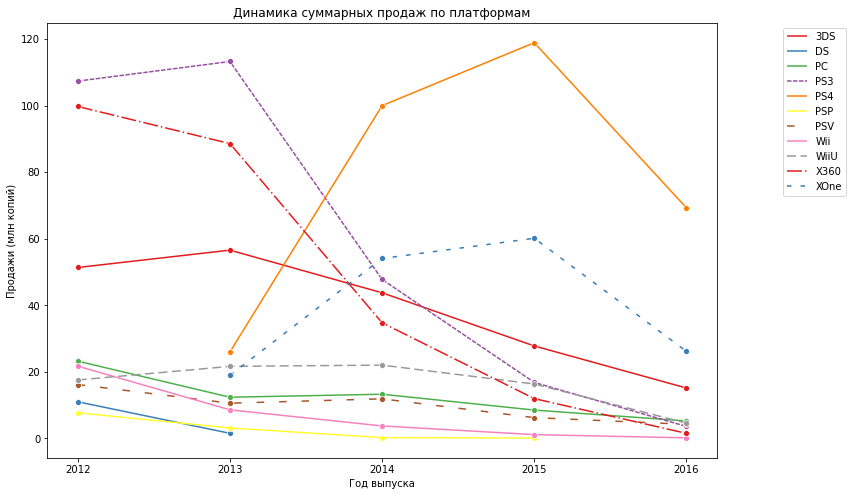

In [38]:
plt.figure(figsize = (12,8))
sns.lineplot(data=recent,\
             dashes=[(10, 0), (10, 0), (10, 0), (3, 1), (10, 0), (10, 0), (5, 10), (10, 0), (6, 3), (10, 2, 1, 2), (3, 6)],
             marker='o', 
             palette="Set1")
plt.title('Динамика суммарных продаж по платформам')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Год выпуска')
plt.xticks([2012,2013,2014,2015,2016])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Всего на нашем графике представлено 11 платформ. 

DS сошел со сцены еще в 2013 году, а PSP &mdash; в 2015. Их в расчет можно не брать.

В числе лидеров продаж с большим отрывом **PS4 и XOne**. Роста они не показывают &mdash; продажи за 2016 год ниже, чем за предшествующие годы, но с другой стороны, данные по 2016 году могут быть не окончательными. Обе платформы появились только в 2013 году, а значит сейчас они на пике. Это также позволяет предположить, что высокий уровень продаж сохранится для них и в 2017. 

Третья по продажам платформа &mdash; **3DS**. Она показывает устойчивое падение с 2013 года, но с другой стороны,  опережает по продажам половину платформ. Можно включить ее в список потенциально прибыльных.

Оставшиеся 6 платформ &mdash; PC, PS3, X360 и другие &mdash; заметно уступают лидерам и показывают падение продаж.

Итак, потенциально прибыльными будем считать три платформы: **PS4, XOne и 3DS.**

<a id="analysis5"></a>
### Диаграмма размаха по глобальным продажам игр

Посмотрим, как распределяются объемы продаж для тех 3 платформ, которые мы сочли потенциально прибыльными. Для этого построим диаграмму размаха по глобальным продажам игр.

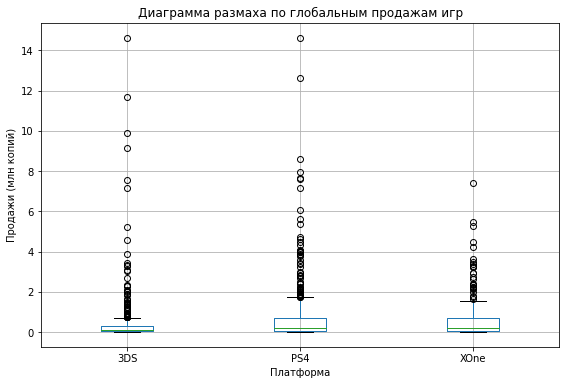

In [39]:
newdata.query('platform in ("PS4", "XOne", "3DS")')\
    .boxplot(by='platform', 
             column='total_sales',
             figsize=(9,6)
            )
plt.title("Диаграмма размаха по глобальным продажам игр")
plt.suptitle("")
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Платформа')
plt.show()

Видим, что типичный объем продаж (в миллионах копий) находится примерно в одном диапазоне для платформ PS4 и XOne, и он практически **вдвое больше**, чем для игр на платформе 3DS. Это вполне согласуется с тем, что мы видели на предыдущем графике.

Увеличим масштаб и посмотрим чуть ближе.

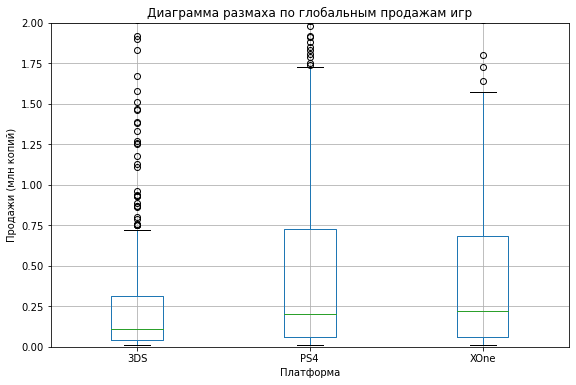

In [40]:
newdata.query('platform in ("PS4", "XOne", "3DS")')\
    .boxplot(by='platform', 
             column='total_sales',
             figsize=(9,6)
            )
plt.ylim(0,2)
plt.title("Диаграмма размаха по глобальным продажам игр")
plt.suptitle("")
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Платформа')
plt.show()

Интересно! На диаграмме размаха мы не видим большого разрыва между PS4 и XOne, в то время как на линейном графике он был очень заметен (разрыв примерно в 50 млн копий в 2014 и 2015 годах). Как это можно объяснить?

Очевидно, всё дело в выбросах. У PS4 видим мощный "хвост" выбросов (визуально у XOne он меньше). Это означает, что PS4 лидирует  за счет отдельных мегапопулярных игр, которые и собирают кассу. Кроме того, возможно, что PS4 выпускает значительно больше тайтлов и берет за счет количества.

Кстати, такие же выбросы (продажи 10-14 млн копий) есть и у 3DS, несмотря на то, что в среднем игры на этой платформе продаются хуже. Это может служить дополнительным аргументом в пользу прибыльности игр 3DS.

<a id="analysis6"></a>
### Зависимость между продажами и оценками пользователей и критиков

Изучим рейтинги игр &mdash; оценки, которые выставляют играм критики и пользователи. Мы предполагаем, что это мощный инструмент для принятия решения о приобретении игры. Если это так, то между этими параметрами должна прослеживаться сильная корреляция.

Проверим эту гипотезу, построив диаграмму рассеяния для трех популярных платформ. Для этого объявим функцию `corr_plot` с датафреймом и названием платформы в качестве аргументов.

In [41]:
def corr_plot(df, name):
    # запишем в список названия столбцов в таблице и соответствующие им подписи
    columns = zip(['critic_score', 'user_score'], ["Оценка критиков", "Оценка пользователей"])
    #построим диаграмму рассеяния 
    for column, title in columns:
        df[df['platform'] == name].plot(x="total_sales", y=column, kind='scatter', alpha=0.6, grid=True)
        plt.xlabel('Суммарные продажи')
        plt.ylabel(title)
        plt.title("Платформа " + name)
    plt.show()
    #построим матрицу корреляции
    display(df[df['platform'] == name][['critic_score', 'user_score', 'total_sales']].corr())

Применим функцию к платформе PS4.

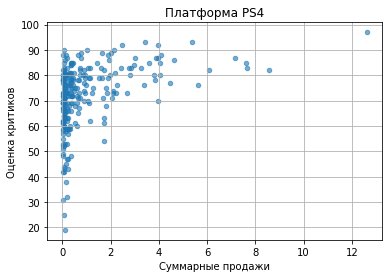

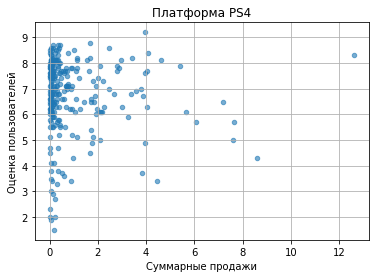

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [42]:
corr_plot(newdata, "PS4")

По первой диаграмме видно, что высокая оценка критиков **в общем и целом коррелирует с высокими продажами**. Игры, которые были низко оценены критиками, так и не стали коммерчески успешными: ни для одной игры с оценкой < 50 баллов не было продано больше миллиона копий, с оценкой < 70 баллов не продано больше 2 миллионов.

Коэффициент корреляции 0.4 свидетельствует о наличии слабой положительной связи.

Что касается пользовательской оценки, то **связи здесь не просматривается** (коэффициент корреляции близок к 0). В целом низких оценок меньше, чем высоких. По диаграмме видим, что некоторые игры с оценкой 3.5 - 5 баллов стали более популярными, чем большинство игр с оценкой 6 и более баллов. В то же время среди игр, оцененных высоко, есть как успешные, так и проходные.

Предварительно можно сделать вывод, что пользовательские оценки более субъективны и иррациональны, поэтому мало связаны с успешностью игр, в то время как критики оценивают более объективно и к ним больше прислушиваются. 

То есть, с одной стороны, мнение критиков может влиять на покупки пользователей, а с другой стороны, критики могут точнее определять, что понравится аудитории.

Теперь посмотрим, какова ситуация с другими платформами.

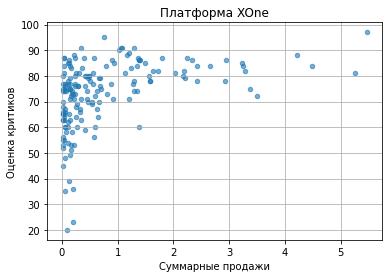

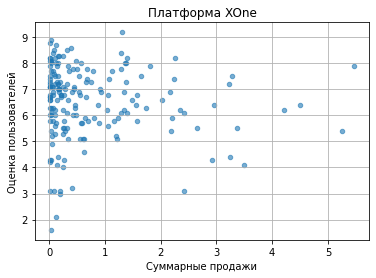

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


In [43]:
corr_plot(newdata, "XOne")

Картина похожая: есть слабая положительная связь между оценкой критиков и продажами игр XOne, но никакой связи между пользовательской оценкой и продажами.

Вторая диаграмма подтверждает это наблюдение: видим хаотичное распределение точек. Да, совсем низко оцененные игры показывают стандартные цифры продаж, но игры со средней оценкой (4-6 баллов) продаются миллионами копий (от 2 и выше). При этом высокий рейтинг у пользователей совершенно не означает столь же высоких продаж. 

Из различий отметим меньший разброс по шкале x &mdash; максимальные значения в области 5 миллионов, в то время как для PS4 продажи достигали 12 млн копий.

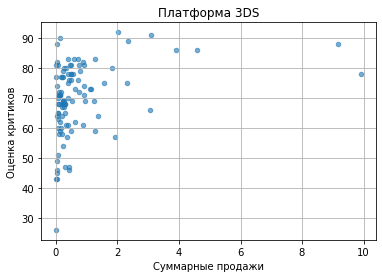

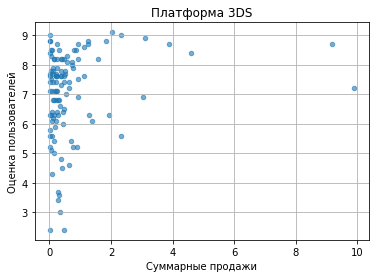

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


In [44]:
corr_plot(newdata, "3DS")

Для платформы 3DS картина в целом не изменилась, хотя показатели немного отличаются.

Корреляция между оценкой критиков и продажами ниже, чем для двух других платформ (0.32), в то время как между пользовательской оценкой и продажами отмечается очень слабая связь (0.2). 

На второй диаграмме точки сосредоточены в основном в верхнем левом углу и небольшим шлейфом справа. Вероятно, игры с высокой оценкой продаются чуть лучше. Но в целом это чересчур слабая связь, чтобы делать по ней какие-либо выводы. 

Теперь посмотрим на общую тенденцию по данным для всех платформ, а не только для топа.

In [45]:
#общая матрица корреляции (по данным для всех платформ)

newdata[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.517727,0.308197
user_score,0.517727,1.000000,0.004429
total_sales,0.308197,0.004429,1.000000


Видим, что тенденция сохраняется и для всех платформ в целом. Во-первых, связь между продажами и пользовательской оценкой практически нулевая.

Во-вторых, есть слабая корреляция между оценкой критиков и продажами &mdash; примерно на том же уровне, что и для отдельно взятых платформ.

<a id="analysis7"></a>
### Распределение игр по жанрам

С рейтингом пока выводы неутешительные: если на критиков можно отчасти положиться с предсказанием популярных игр, то пользователям верить нельзя. 

Возможно, мы найдем достойные игры для продвижения в каком-то определенном жанре? Посмотрим, какие из жанров продаются лучше.

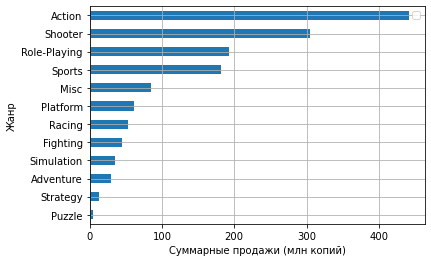

In [46]:
newdata\
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales')\
    .plot(kind='barh', grid=True)
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Жанр')
plt.legend('')
plt.show()

У нас выделяется самый коммерчески успешный жанр &mdash; это Action с более чем 400 млн проданных копий. За ним с большим отрывом следуют жанры Shooter, Role-Playing и Sports. 

Судя по диаграмме, наименее продаваемые жанры &mdash; это Adventure, Strategy и Puzzle.

Интересно проверить, как соотносится количество проданных копий с количеством выпущенных игр. Другими словами, это десяток крутых игр продаются миллионами копий или же индустрия штампует тысячи игр определенного жанра в надежде, что какая-то из них "выстрелит"?

Посмотрим на распределение жанров в зависимости от количества проданных копий в пересчете на одну игру.

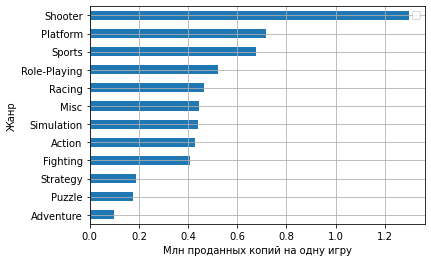

In [47]:
# построим сводную таблицу, подсчитав количество проданных игр и суммарные продажи
sales = (newdata
        .pivot_table(
            index='genre', 
            aggfunc=({'total_sales':'sum', 'name': 'count'}))
        )

# добавим столбец со средним количеством проданных копий (млн) на одну игру
sales['avg_sales'] = sales['total_sales'] / sales['name']

(sales
 .sort_values(by='avg_sales')
 .plot(kind='barh', y='avg_sales', grid=True)
)

plt.ylabel('Жанр')
plt.xlabel('Млн проданных копий на одну игру')
plt.legend('')
plt.show()

И вот тут картина иная. Теперь лидирует жанр Shooter c 1.2 млн проданных копий на игру, за ним Platform, Sports и Role-Playing.

Интересно, что жанр Action откатился на 8 место, то есть на общем фоне количество проданных копий на одну игру сравнительно невелико. Но это только средний показатель. Можно ли утверждать, что прибыльность этого жанра обусловлена огромным количеством выпускаемых игр? Посмотрим на распределение продаж для игр двух этих жанров. 

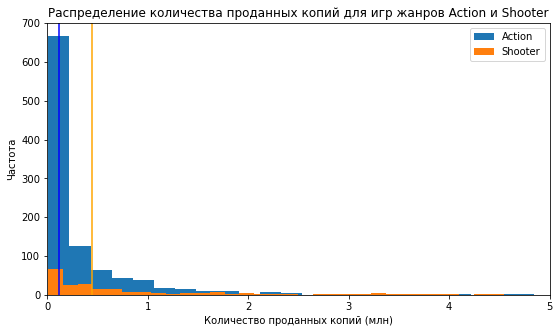

In [48]:
ax1, ax2 = plt.subplots(figsize=(9,5))
ax1 = newdata.query('genre == "Action"')['total_sales'].plot(kind='hist', bins=100)
ax2 = newdata.query('genre == "Shooter"')['total_sales'].plot(kind='hist', bins=100)
plt.title('Распределение количества проданных копий для игр жанров Action и Shooter')
plt.xlabel('Количество проданных копий (млн)')
plt.ylabel('Частота')
plt.xlim(0, 5)
plt.legend(['Action', 'Shooter'])
plt.axvline(newdata.query('genre == "Action"').total_sales.median(), color = 'b')
plt.axvline(newdata.query('genre == "Shooter"').total_sales.median(), color = 'orange')
plt.show()

In [49]:
display(newdata.query('genre == "Action"')['total_sales'].describe())
display(newdata.query('genre == "Shooter"')['total_sales'].describe())

count    1031.000000
mean        0.427856
std         1.166504
min         0.010000
25%         0.030000
50%         0.120000
75%         0.390000
max        21.050000
Name: total_sales, dtype: float64

count    235.000000
mean       1.296723
std        2.251662
min        0.010000
25%        0.135000
50%        0.440000
75%        1.480000
max       14.630000
Name: total_sales, dtype: float64

Действительно, оба распределения скошены вправо, но у игр жанра Action очень большой пик на небольших значениях. Кроме того, медианное значение продаж для жанра Shooter в три раза выше, чем для Action (вертикальные линии на графике).

Получается, с жанром Shooter все наоборот &mdash; будучи на втором месте по абсолютному количеству проданных копий, этот жанр следует правилу "Лучше меньше, да лучше": игр выпускается меньше, но в среднем каждая из них предположительно приносит больше продаж. Это еще одна гипотеза, которую имеет смысл проверить при планировании кампаний для нашего интернет-магазина.

Также отметим, что жанры Shooter, Sports, Role-Playing входят в первую четверку по обоим параметрам: абсолютному количеству проданных копий и количеству проданных копий на одну игру. 

Что касается Adventure, Strategy и Puzzle, то они так и остались в конце списка. Делать на них ставку в наших рекламных кампаниях, пожалуй, не стоит.

<a id="4_sum"></a>
### Выводы

Мы посмотрели изменение продаж по платформам за 37 лет, выбрали актуальный период и проанализировали, как рейтинги и жанры влияют на успешность платформ. 

**Основные наблюдения:**

* Мы проанализировали количество игр по году выпуска. Выяснили, что до середины 90-х количество выпускаемых игр в год не превышало 200, а бум игр пришелся на **десятилетие с 2002 по 2012 годы**.

* Посмотрев динамику продаж для топ-5 популярных платформ за все время, мы выяснили, что **срок жизни платформы &mdash; примерно 7 лет** (у популярных ближе к 10). Пик продаж приходится на 3-5 годы с момента возникновения.
 
* Исходя из жизненного цикла одной платформы, для дальнейшего анализа мы выбрали **данные за последние пять лет**, с 2012 по 2016 годы. Это позволяет сделать прогноз на 2017 год: платформы, которые возникли в этот промежуток, сейчас должны быть на пике популярности. Также можно оценить, какие из платформ уже на спаде.

* К числу потенциально прибыльных мы отнесли три платформы: **PS4, XOne и 3DS.** Они показали наибольшие продажи и лучшую динамику за последние 5 лет, хотя 2016 год в этом отношении не показательный.

* Сравнив типичные значения продаж для прибыльных платформ, у платформ PS4 и 3DS отметили большое количество выбросов. Можно предположить, что прибыльность платформ определяется **отдельными мегапопулярными играми**, которые приносят основной доход.

* Пользовательская оценка никак не влияет на продажи, в то время как **между оценкой критиков и продажами зависимость есть**, хоть и слабая. От платформы это не зависит: картина одинаковая и когда мы рассматриваем все платформы в целом, и когда смотрим на них по отдельности. Бизнесу стоит обратить внимание на игры с оценкой от 70 баллов.

* В абсолютном выражении самый популярный жанр — это Action, игр в этом жанре продано на 100 млн копий больше, чем для следующего по популярности жанра Shooter. При этом жанр Shooter лидирует по количеству проданных копий на одну игру. Также в четверку успешных жанров входят Sports и Role-Playing.

* К наименее популярным жанрам можно отнести Adventure, Strategy и Puzzle.

<a id="region"></a>
## Описание пользователей каждого региона

<a id="5_platform"></a>
### Топ-5 популярных платформ

Мы уже выяснили, какие платформы были самыми успешными за все время и какие можно считать перспективными. Но вкусы пользователей могут быть различны! Возможно, нам нужно настроить геотаргетинг для наших рекламных кампаний. У нас есть данные по трем крупным регионам &mdash; Европе, Северной Америке и Японии. 

Сначала посмотрим на самые популярные платформы в трех регионах. Соберем данные в сводную таблицу `top5_platform`, в столбцах просуммируем объем продаж по каждому региону: NA, EU, JP. Также рассчитаем долю продаж каждой платформы по региону.

In [50]:
top5_platform = (newdata
                 .pivot_table
                 (index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
                )
#добавим столбцы с долей продаж игр каждой платформы по каждому региону
top5_platform['eu_share'] = top5_platform['eu_sales'] / top5_platform['eu_sales'].sum()
top5_platform['jp_share'] = top5_platform['jp_sales'] / top5_platform['jp_sales'].sum()
top5_platform['na_share'] = top5_platform['na_sales'] / top5_platform['na_sales'].sum()

(top5_platform
         .sort_values(by='eu_share', ascending=False)
         .head()
         .style.format({'eu_share':'{:.2%}', 'jp_share':'{:.2%}', 'na_share':'{:.2%}'})
)

,eu_sales,jp_sales,na_sales,eu_share,jp_share,na_share
platform,,,,,,
PS4,141.090000,15.960000,108.740000,27.84%,8.29%,18.40%
PS3,106.860000,35.290000,103.380000,21.08%,18.32%,17.49%
X360,74.520000,1.570000,140.050000,14.70%,0.82%,23.70%
XOne,51.590000,0.340000,93.120000,10.18%,0.18%,15.76%
3DS,42.640000,87.790000,55.310000,8.41%,45.59%,9.36%


Чтобы выделить топ-5, построим диаграммы по каждому региону, предварительно отсортировав данные по убыванию и взяв первые 5 строк таблицы. 

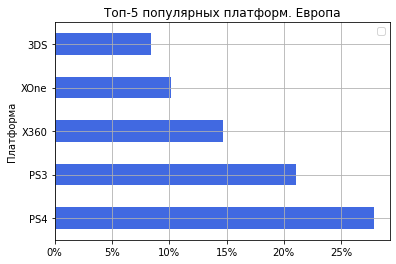

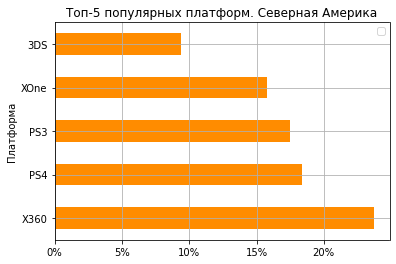

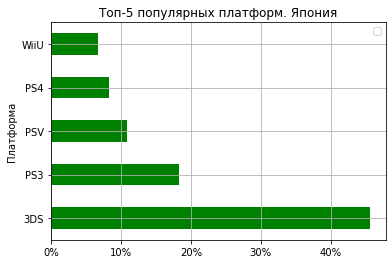

In [51]:
region_lst = (zip(['eu_share', 'na_share', 'jp_share'], 
                  ['Европа', 'Северная Америка', 'Япония'], 
                  ['royalblue', 'darkorange', 'green']))

for region, title, color in region_lst:
    fig = top5_platform[[region]]\
        .sort_values(by=region, ascending=False)\
        .head()\
        .plot(kind='barh', grid=True, color=color)
    fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))
    plt.title('Топ-5 популярных платформ. ' + title)
    plt.ylabel('Платформа')
    plt.legend('')
    plt.show()

Видим, что для Европы и Северной Америки топ-5 полностью совпадает, хотя и в разном порядке: в Европе абсолютный фаворит &mdash; это PS4 (27%), а в Америке &mdash; X360 (23%). Каждый из фаворитов занимает плюс-минус четверть от рынка. 

В Европе разрыв между платформами составляет 5-6 процентных пунктов, а в Северной Америке первые четыре платформы конкурируют примерно на равных.

Иная ситуация в Японии. Здесь почти половину рынка занимает 3DS (45%), остальные следуют с большим отрывом. Кроме 3DS, в списке есть еще две консоли, общие с Европой и Северной Америкой &mdash; это PS3 и PS4. Также в топ-5 в Японии вошли PSV и WiiU.

Теперь посмотрим, как это выглядит в сравнении для 3 регионов. Данные отсортированы по убыванию доли продаж на европейском рынке. 

Объявим функцию `myplot` с датафреймом и размерами изображения (x, y) в качестве аргументов.

In [52]:
def myplot(df, x, y):
    fig, ax = plt.subplots(figsize=(x,y))
    fig = (df[['eu_share', 'na_share', 'jp_share']]
        .sort_values(by='eu_share', ascending=False)
        .plot(kind='bar', ax=ax, stacked=True, grid=True))
    plt.xticks(rotation=0)
    fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
    plt.legend(['Европа', 'Северная Америка', 'Япония'])

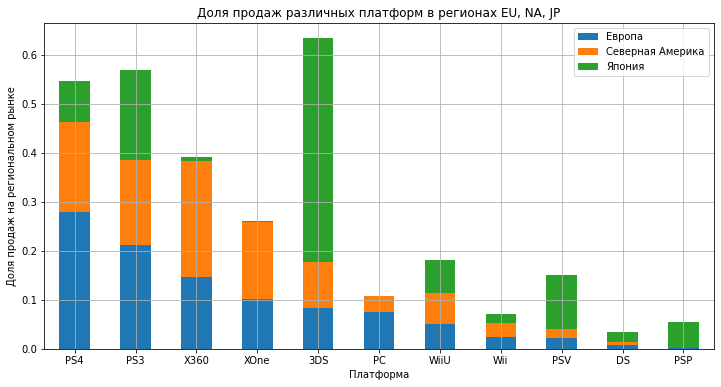

In [53]:
myplot(top5_platform, 12, 6)
plt.xlabel('Платформа')
plt.ylabel('Доля продаж на региональном рынке')
plt.title('Доля продаж различных платформ в регионах EU, NA, JP')
plt.show()

Итак, по диаграмме видно, что европейский и североамериканский рынок весьма схожи в том, как распределились продажи платформ. 

Японский рынок показывает принципиально иное распределение: и топ отличается, и пропорции иные. Несколько платформ явно более популярны в Японии, чем в Европе или Америке &mdash; помимо 3DS, это PSV и PSP. И напротив, в Японии совсем не популярны PC, XOne и X360, которые держат уверенные позиции в других регионах.

<a id="5_genre"></a>
### Топ-5 популярных жанров

Аналогично построим сводную таблицу по жанрам и регионам. Вычислим долю жанров, популярных для каждого региона.

In [54]:
top5_genre = (newdata
                 .pivot_table
                 (index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
                )
#добавим столбцы с долей продаж игр каждого жанра по каждому региону
top5_genre['eu_share'] = top5_genre['eu_sales'] / top5_genre['eu_sales'].sum()
top5_genre['jp_share'] = top5_genre['jp_sales'] / top5_genre['jp_sales'].sum()
top5_genre['na_share'] = top5_genre['na_sales'] / top5_genre['na_sales'].sum()
(top5_genre
         .sort_values(by='eu_share', ascending=False)
         .style.format({'eu_share':'{:.2%}', 'jp_share':'{:.2%}', 'na_share':'{:.2%}'})
)

,eu_sales,jp_sales,na_sales,eu_share,jp_share,na_share
genre,,,,,,
Action,159.340000,52.800000,177.840000,31.44%,27.42%,30.09%
Shooter,113.470000,9.230000,144.770000,22.39%,4.79%,24.50%
Sports,69.090000,8.010000,81.530000,13.63%,4.16%,13.80%
Role-Playing,48.530000,65.440000,64.000000,9.58%,33.98%,10.83%
Racing,27.290000,2.500000,17.220000,5.38%,1.30%,2.91%
Misc,26.320000,12.860000,38.190000,5.19%,6.68%,6.46%
Platform,21.410000,8.630000,25.380000,4.22%,4.48%,4.29%
Simulation,14.550000,10.410000,7.970000,2.87%,5.41%,1.35%
Fighting,10.790000,9.440000,19.790000,2.13%,4.90%,3.35%


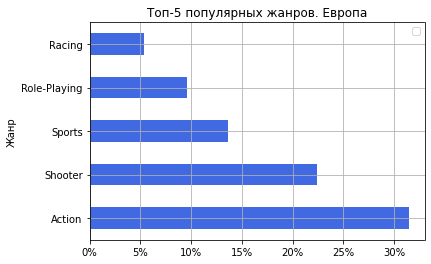

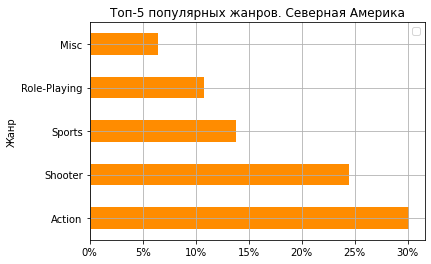

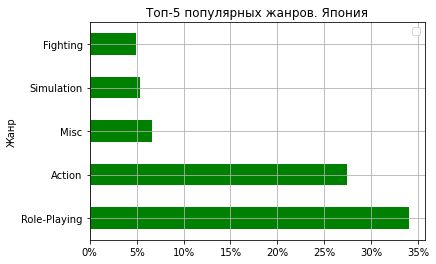

In [55]:
region_lst = (zip(['eu_share', 'na_share', 'jp_share'], 
                  ['Европа', 'Северная Америка', 'Япония'], 
                  ['royalblue', 'darkorange', 'green']))

for region, title, color in region_lst:
    fig = top5_genre[[region]]\
        .sort_values(by=region, ascending=False)\
        .head()\
        .plot(kind='barh', grid=True, color=color)
    fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))
    plt.title('Топ-5 популярных жанров. ' + title)
    plt.ylabel('Жанр')
    plt.legend('')
    plt.show()

Пользовательские предпочтения относительно жанров в Европе и Северной Америке очень похожи. Первые 4 места в топе совпадают: лидируют Action и Shooter, за ними Sports и Role-Playing. В процентном соотношении доли также распределены сходным образом.

Япония &mdash; дело иное. Первое и второе места занимают Role-Playing и Action, за ними с большим отрывом идут Misc, Simulation и Fighting. Восточные единоборства в почете, а места шутерам в топе вообще не нашлось.

Посмотрим еще раз на сравнительной диаграмме.

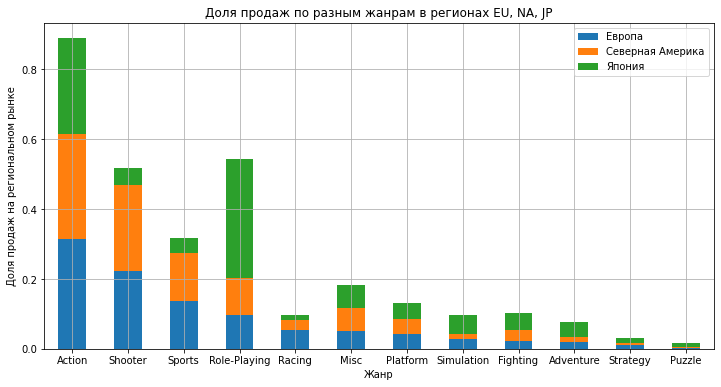

In [56]:
myplot(top5_genre, 12, 6)
plt.xlabel('Жанр')
plt.ylabel('Доля продаж на региональном рынке')
plt.title('Доля продаж по разным жанрам в регионах EU, NA, JP')
plt.show()

Итак, жанр Action одинаково любим во всех трех регионах. Такая же картина с "бродилками" (Platform), хотя популярность их несравненно ниже. 

Из других жанров американцы и европейцы отдают явное предпочтение Shooter и Sports, а японцы &mdash; Role-Playing.

Все-таки культурные различия &mdash; важная штука.

<a id="esrb"></a>
###  Влияние рейтинга ESRB на продажи игр в отдельных регионах

Сначала посмотрим, какие вообще есть в нашей таблице значения рейтинга, и разберемся с обозначениями.

In [57]:
print(newdata.esrb_rating.unique())

['M' 'undefined' 'E' 'E10+' 'T']


Итак, помимо пропущенных рейтингов (undefined), видим 4 категории (__[источник](https://www.esrb.org/ratings-guide/)__): 

- E (для любого возраста), 
- E10+ (с 10 лет), 
- T (начиная с подросткового возраста - 13 лет), 
- M (для взрослых с 17 лет). 

Еще есть A (для совсем взрослых), но в нашей таблице этот рейтинг отсутствует.

Чтобы изучить зависимость между рейтингом и продажами игр, построим сводную таблицу с группировкой по категориям рейтинга и вычислим доли продаж по каждой категории.

In [58]:
esrb = newdata.groupby(['esrb_rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
esrb['na_share'] = esrb['na_sales'] / esrb['na_sales'].sum()
esrb['eu_share'] = esrb['eu_sales'] / esrb['eu_sales'].sum()
esrb['jp_share'] = esrb['jp_sales'] / esrb['jp_sales'].sum()
(esrb.style.format
 ({'eu_share':'{:.2%}', 
   'jp_share':'{:.2%}', 
   'na_share':'{:.2%}'})
)

,na_sales,eu_sales,jp_sales,na_share,eu_share,jp_share
esrb_rating,,,,,,
E,114.370000,113.030000,28.330000,19.35%,22.30%,14.71%
E10+,75.700000,55.370000,8.190000,12.81%,10.92%,4.25%
M,231.570000,193.960000,21.200000,39.18%,38.27%,11.01%
T,66.020000,52.960000,26.020000,11.17%,10.45%,13.51%
undefined,103.310000,91.500000,108.840000,17.48%,18.05%,56.52%


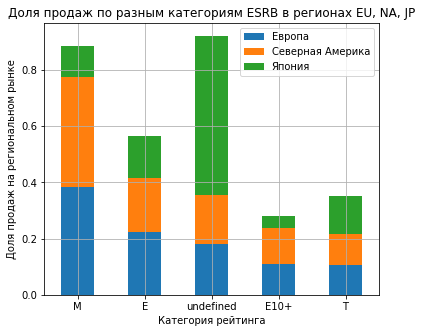

In [59]:
myplot(esrb, 6, 5)
plt.xlabel('Категория рейтинга')
plt.ylabel('Доля продаж на региональном рынке')
plt.title('Доля продаж по разным категориям ESRB в регионах EU, NA, JP')
plt.show()

Во-первых, у нас "просела" Япония по доле немаркированных игр &mdash; их больше половины. Можно объяснить это так: ESRB  &mdash; это американская ассоциация, а игры японских производителей в первую очередь будет оценивать японская рейтинговая ассоциация __[CERO](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization)__. Правда, японские игры идут и на мировой рынок, так что можно было бы и оценить... 
    
В Европе и Америке маркировка ESRB отсутствует чуть меньше чем для 20% игр.

Взглянем на долю `undefined` в зависимости от платформы.

In [60]:
undefined = (newdata
             .pivot_table(
                 index = 'platform', 
                 columns = 'esrb_rating', 
                 values='total_sales', 
                 aggfunc = 'count')
            )

undefined['undef_part'] = (undefined['undefined'] 
                           / (undefined['E'] + undefined['E10+'] + undefined['M'] + undefined['T'] + undefined['undefined'])
                          )
undefined.style.format({'undef_part': "{:.2%}"})

esrb_rating,E,E10+,M,T,undefined,undef_part
platform,,,,,,
3DS,54.000000,53.000000,9.000000,26.000000,254.000000,64.14%
DS,10.000000,5.000000,nan,nan,16.000000,nan%
PC,36.000000,17.000000,91.000000,41.000000,65.000000,26.00%
PS3,64.000000,39.000000,106.000000,91.000000,193.000000,39.15%
PS4,54.000000,40.000000,76.000000,85.000000,137.000000,34.95%
PSP,5.000000,nan,nan,2.000000,166.000000,nan%
PSV,20.000000,23.000000,32.000000,63.000000,273.000000,66.42%
Wii,17.000000,15.000000,nan,2.000000,20.000000,nan%
WiiU,35.000000,42.000000,15.000000,13.000000,42.000000,28.57%


Да, у игр японских брендов (Nintendo, Playstation) самый высокий процент пропусков (до 66% для одной платформы), в то время как, например, для XBox пропусков существенно меньше.

В общем, делать выводы по связи рейтинга и продаж в Японии будет не очень достоверно.

Во-вторых, все же определенные наблюдения по регионам есть. В Северной Америке и Европе лучше всего продаются игры категории M, то есть для взрослой аудитории. Они составляют около 40% от общего объема продаж.

В Японии примерно по 13-15% приходится на игры категорий E и T, и только 11% &mdash; на категорию M. Возможно, в Японии играющая аудитория значительно моложе, или же вкусы у взрослой аудитории отличаются, что мы уже видели, сравнивая жанры. Однако, повторимся, более половины игр в Японии имеют неизвестную маркировку, так что выводы делать сложно. 

По крайней мере, шутеры в Японии не очень популярны, а они, вероятно, в большинстве своем получают маркировку M.

Посмотрим, как распределились маркировки ESRB по разным жанрам.

In [61]:
genres_esrb = (newdata
               .pivot_table(
                   index='genre', 
                   columns='esrb_rating', 
                   values='name', 
                   aggfunc='count')
              )

genres_esrb['e_part'] = genres_esrb['E'] / genres_esrb['E'].sum()
genres_esrb['e10_part'] = genres_esrb['E10+'] / genres_esrb['E10+'].sum()
genres_esrb['m_part'] = genres_esrb['M'] / genres_esrb['M'].sum()
genres_esrb['t_part'] = genres_esrb['T'] / genres_esrb['T'].sum()

(genres_esrb.style.format({'e_part': "{:.2%}",
                          'e10_part': "{:.2%}",
                          'm_part': "{:.2%}",
                          't_part': "{:.2%}"})
                        .highlight_max(
                            subset=['e_part', 'e10_part', 'm_part', 't_part'], 
                            color='yellow', 
                            axis=0)
)    

esrb_rating,E,E10+,M,T,undefined,e_part,e10_part,m_part,t_part
genre,,,,,,,,,
Action,73.000000,130.000000,215.000000,138.000000,475.000000,18.48%,42.48%,43.17%,33.50%
Adventure,4.000000,19.000000,31.000000,14.000000,234.000000,1.01%,6.21%,6.22%,3.40%
Fighting,nan,3.000000,11.000000,57.000000,38.000000,nan%,0.98%,2.21%,13.83%
Misc,21.000000,40.000000,5.000000,19.000000,107.000000,5.32%,13.07%,1.00%,4.61%
Platform,28.000000,40.000000,nan,5.000000,12.000000,7.09%,13.07%,nan%,1.21%
Puzzle,9.000000,6.000000,nan,1.000000,12.000000,2.28%,1.96%,nan%,0.24%
Racing,62.000000,14.000000,2.000000,10.000000,27.000000,15.70%,4.58%,0.40%,2.43%
Role-Playing,5.000000,12.000000,70.000000,86.000000,197.000000,1.27%,3.92%,14.06%,20.87%
Shooter,nan,16.000000,158.000000,27.000000,34.000000,nan%,5.23%,31.73%,6.55%


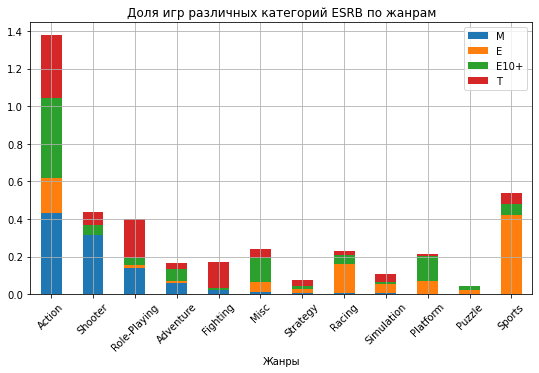

In [62]:
fig, ax = plt.subplots(figsize=(9,5))
fig = (genres_esrb[['m_part', 'e_part', 'e10_part', 't_part']]
           .sort_values(by='m_part', ascending=False)
          .plot(kind='bar', ax=ax, stacked=True, grid=True))
plt.xticks(rotation=45)
fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
plt.xlabel('Жанры')
plt.ylabel('')
plt.title('Доля игр различных категорий ESRB по жанрам')
plt.legend(['M', 'E', 'E10+', 'T'])
plt.show()

Действительно, большая часть игр Shooter получает маркировку M. В то же время у очень популярных в Японии жанров Action и Role-Playing присутствуют различные маркировки &mdash; в том числе, T, E и E10+.

Правда, окончательные выводы делать по нашим данным затруднительно, так как рейтинг ЕSRB отсутствовал у многих игр.

<a id="5_sum"></a>
### Выводы

В целом, портреты европейских и североамериканских пользователей получились очень похожими. 

* **Топ-5 популярных платформ для EU и NA:** PS3, PS4, 3DS, XOne, X360 (для двух регионов отличается только порядок). Фавориты различны: в Европе это PS4, а в Северной Америке — X360. Доля рынка у них — около четверти.
* **Топ-5 популярных жанров для EU и NA:** первые четыре места полностью совпали &mdash; Action, Shooter, Sports и Role-Playing. Также в Европе в топ вошел жанр Racing, а в Америке — Misc.
* **Влияние рейтинга ESRB** проявляется в том, что лучше всего продаются игры категории M (половина от общего объема продаж).

Что касается Японии, то портрет типичного пользователя имеет специфические черты:
* **Топ-5 популярных платформ для JP:** 3DS, PS3, PS4, PSV и WiiU. Видим в топе две платформы, которые не так популярны в EU и NA. Кроме того, фаворит 3DS занимает почти половину рынка. На выбор платформ может влиять и привычка к использованию портативных устройств, и желание поддержать отечественного производителя. 
* **Топ-5 популярных жанров для JP:** Role-Playing, Action, за ними с большим отрывом идут Misc, Simulation и Fighting.
* **Влияние рейтинга ESRB** в Японии оценивать сложно: более чем для половины игр маркировка отсутствует. Вероятно, это связано с тем, что ESRB - это американская рейтинговая ассоциация, и по многим японским играм категории нет. По 15% продаж приходится на игры категорий E и T, а категория M чуть менее популярна. Либо аудитория в среднем младше, либо дело в предпочтении аудиторией определенных жанров.

Кроме того, можно заметить, что:
* Платформы PS3, PS4, 3DS входят в топ-5 во всех трех регионах.
* Жанры Action и Role-Playing входят в топ-5 во всех трех регионах. 
* Жанр игры и маркировка, которую она получает, могут быть взаимосвязаны. Соответственно, и продаваемость игр определенной категории будет взаимосвязана с жанровыми предпочтениями того или иного региона.

<a id="hyp"></a>
## Проверка гипотез

<a id="hyp1"></a>
### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Сначала оценим распределение рейтингов для двух платформ визуально, построив гистограмму, а также рассчитаем основные статистики.

Для этого объявим функцию `myhist`.

In [63]:
def myhist(df, column1, column2, value1, value2):
    display(HTML('<b>' + value1 + '</b>'))
    display(df[df[column1] == value1][column2].describe())
            
    display(HTML('<b>' + value2 + '</b>'))
    display(df[df[column1] == value2][column2].describe())
    (sns.distplot(df[df[column1] == value1][column2].dropna(), 
                   hist=True, 
                   kde=True,
                   kde_kws={'linewidth': 4},
                   label=value1))
    (sns.distplot(df[df[column1] == value2][column2].dropna(), 
                   hist=True, 
                   kde=True,
                   kde_kws={'linewidth': 4},
                   label=value2))
    plt.axvline(df[df[column1] == value1][column2].mean(), color = 'blue')
    plt.axvline(df[df[column1] == value2][column2].mean(), color = 'orange')
    plt.legend()
    plt.ylabel('Плотность')    

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

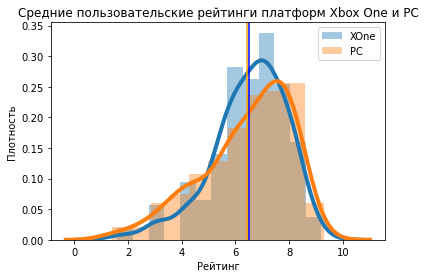

In [64]:
myhist(newdata, 'platform', 'user_score', 'XOne', 'PC')
plt.title('Cредние пользовательские рейтинги платформ Xbox One и PC')
plt.xlabel('Рейтинг')
plt.show()

Распределения напоминают нормальные, но скошены влево. На графике средние практически совпадают &mdash; линии почти наложились друг на друга, да и столбцы гистограмм также совпадают.

Убедимся, что это не случайное ли совпадение. Для этого воспользуемся критерием Стьюдента. Даже если распределения не являются нормальными, наши выборки достаточно велики, чтобы применить t-тест. 

Сформулируем нулевую гипотезу H0:

**Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC**

Альтернативная гипотеза H1:

**Средние пользовательские рейтинги платформ Xbox One и PC не равны**

Стандартные отклонения различны, то есть дисперсии тоже будут различаться, но намного ли? Воспользуемся тестом Левена, чтобы проверить равенство дисперсий для наших двух выборок. За уровень значимости возьмем 5%.

In [65]:
alpha = .05
stat, pvalue = (st.levene
                (newdata.query('platform == "XOne"')['user_score'].dropna(), 
                 newdata.query('platform == "PC"')['user_score'].dropna())
               )

print('P-value:', pvalue)

if (pvalue < alpha):
    print("Считаем, что дисперсии двух выборок не равны")
else:
    print("Считаем, что дисперсии двух выборок равны")

P-value: 0.01251484281850554
Считаем, что дисперсии двух выборок не равны


В таком случае задаем параметр `equal_var` = False.

In [66]:
stat, pvalue = (st.ttest_ind
                (newdata.query('platform == "XOne"')['user_score'].dropna(), 
                 newdata.query('platform == "PC"')['user_score'].dropna(), 
                 equal_var = False)
               )

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Получили довольно высокий p-value, равный 0.54. Значит, статистически значимых различий в средних рейтингах для платформ PC и Xbox One нет. 

Средние рейтинги равны, продажи выше у Xbox One... Ясно, кого нужно включать в рекламную кампанию.

<a id="hyp2"></a>
### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports

Начнем также с расчета статистик и построения гистограммы.

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

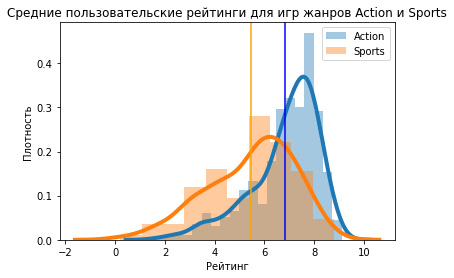

In [67]:
myhist(newdata, 'genre', 'user_score', 'Action', 'Sports')
plt.title('Cредние пользовательские рейтинги для игр жанров Action и Sports')
plt.xlabel('Рейтинг')
plt.show()

Распределение рейтингов для жанра Sports выглядит нормальным, у выборки по жанру Action заметен скос влево. Средние значения, обозначенные вертикальными линиями, различаются: для Sports среднее ниже, чем для Action. Проведем статистический тест, чтобы проверить нашу гипотезу.

Сформулируем нулевую гипотезу H0:

**Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports**

Альтернативная гипотеза H1:

**Средние пользовательские рейтинги жанров Action и Sports не равны**

Узнаем, различны ли дисперсии. Судя по значениям стандартного отклонения &mdash; да, будут различны.

In [68]:
stat, pvalue = (st.levene
                (newdata.query('genre == "Action"')['user_score'].dropna(), 
                 newdata.query('genre == "Sports"')['user_score'].dropna())
               )

print('P-value:', pvalue)

if (pvalue < alpha):
    print("Считаем, что дисперсии двух выборок не равны")
else:
    print("Считаем, что дисперсии двух выборок равны")

P-value: 1.3125789036876737e-05
Считаем, что дисперсии двух выборок не равны


Результат теста Левена согласуется с нашим предположением. Устанавливаем `equal_var` = False и проверяем нашу нулевую гипотезу.

In [69]:
stat, pvalue = (st.ttest_ind
                (newdata.query('genre == "Action"')['user_score'].dropna(), 
                 newdata.query('genre == "Sports"')['user_score'].dropna(), 
                 equal_var = False)
               )

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Получили p-value, близкое к нулю. Значит, мы можем отклонить нулевую гипотезу о равенстве средних: наблюдаемая нами разница в средних рейтингах неслучайна.  

Оценивают по-разному, но все равно покупают! По меньшей мере, в Европе и Северной Америке. Значит, исключать совсем игры жанра Sports не стоит. 

<a id="hyp3"></a>
### Гипотеза о различии среднего количества продаж для жанров Action и Shooter

Ранее мы анализировали жанры по объему продаж и обратили внимание, что по общему количеству проданных игр лидирует Action, а по количеству проданных копий на одну игру &mdash; Shooter. Тогда мы предположили, что среднее количество проданных копий будет выше для Shooter.

Если так, то в таком случае имеет смысл делать ставку на игры жанра Shooter &mdash; ведь тогда в среднем каждая игра будет продаваться лучше, чем Action. Проверим эту гипотезу.

count    1031.000000
mean        0.427856
std         1.166504
min         0.010000
25%         0.030000
50%         0.120000
75%         0.390000
max        21.050000
Name: total_sales, dtype: float64

count    235.000000
mean       1.296723
std        2.251662
min        0.010000
25%        0.135000
50%        0.440000
75%        1.480000
max       14.630000
Name: total_sales, dtype: float64

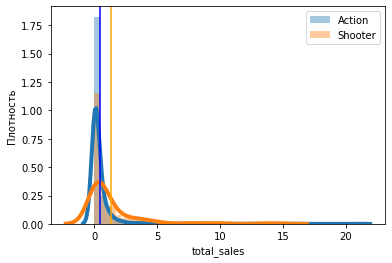

In [70]:
myhist(newdata, 'genre', 'total_sales', 'Action', 'Shooter')

Оба распределения сильно скошены вправо. График, соответствующий жанру Action, имеет высокий пик на малых значениях, второе распределение более плоское. Центры распределений различаются, на графике они обозначены вертикальными линиями. 

Величина стандартного отклонения для Shooter вдвое выше, чем для Action. Этого достаточно, чтобы сделать вывод о различии дисперсий, поэтому тест Левена можно не проводить.

У нас две категориальные переменные (жанр) и одна количественная &mdash; количество проданных копий. Объем выборок достаточно велик: 1031 и 235 значений соответственно, поэтому выбираем t-тест. Уровень значимости &mdash; 5%.

В качестве нулевой гипотезы H0 примем следующее:

**Среднее количество проданных копий для жанров Action и Shooter не отличается.**

Тогда альтернативная гипотеза H1:

**Среднее количество проданных копий различается для жанров Action и Shooter.**

In [71]:
stat, pvalue = (st.ttest_ind
                (newdata.query('genre == "Action"')['total_sales'].dropna(), 
                 newdata.query('genre == "Shooter"')['total_sales'].dropna(), 
                 equal_var = False)
               )

print('p-значение:', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.5682409217258537e-08
Отвергаем нулевую гипотезу


Мы получили очень низкое значение p-value. Значит, мы отвергаем нулевую гипотезу о равенстве средних. Можно говорить о том, что статистически среднее количество продаж для жанров Action и Shooter различно, а результаты теста являются статистически значимыми.

<a id="6_sum"></a>
### Выводы

Мы выдвинули три гипотезы: 
* о равенстве средних пользовательских рейтингов для платформ PC и Xbox One
* о различии средних рейтингов для игр жанра Action и Sports
* о различии среднего объема продаж для игр жанра Action и Shooter

По итогам статистического теста мы не отклонили первую гипотезу. Статистически средние рейтинги для платформ не отличаются.

Вторую гипотезу мы принимаем. По итогам теста мы отклонили нулевую гипотезу о равенстве средних рейтингов. Получается, что пользователи в среднем по-другому оценивают игры жанра Sports, чем Action.

Третья гипотеза была выдвинута нами в ходе анализа прибыльных жанров. Статистически средний объем продаж для жанров Action и Shooter различен (для Shooter выше). 

<a id="total"></a>
## Общий вывод

Мы провели исследование для планирования продаж на 2017 год в магазине компьютерных игр. В нашем распоряжении были исторические данные о продажах игр в 4 разных регионах за 37 лет, начиная с 1980 по 2016 год. Статистика включала в себя:

- информацию об играх (платформа, год выпуска, жанр, возрастная категория от ESRB)
- информацию о продажах по регионам (в млн копий)
- рейтинг критиков и пользователей

Нашей задачей было определить закономерности для коммерчески успешных игр, чтобы продвигать их в магазине.

В ходе анализа исторических данных за все время мы выяснили, что:

- В 80-е и 90-е игр выпускалось сравнительно мало. Бум игр пришелся на десятилетие с 2002 по 2012.
- Средний жизненный цикл платформы составляет около 7-10 лет. Пика продаж она достигает на 3-5 году существования.
- Исходя из этого, мы выбрали для дальнейшего анализа пятилетний период с 2012 по 2016 год.

Исследуя данные за 2012-2016, мы получили следующие результаты:

- Основной объем продаж на рынке делили между собой 11 платформ. Из них две уже сошли со сцены, шесть показывают стабильное падение и низкие продажи, и только три платформы лидируют: **PS4, XOne и 3DS.** Они показали наибольший объем продаж и лучшую динамику за последние 5 лет. Значит, их можно считать потенциально прибыльными и в 2017 году.
- При том что типичный объем продаж для игр PS4 и XOne находится в одном диапазоне (от 50 до 700 тысяч копий), PS4 лидирует с большим отрывом. Это объясняется тем, что отдельные мегапопулярные игры **продаются в десятки раз лучше (10-15 млн копий)**. Это верно как для PS4, так и для 3DS. Поэтому нам важно выбрать для продвижения популярные игры, которые принесут больше продаж, а не просто любую игру данных платформ.
- Мы решили проверить, влияет ли рейтинг игры на ее продажи. Это позволило бы предсказать успешные игры. Выяснилось, что **между оценкой критиков и объемом продаж есть связь**, хоть и слабая. А вот пользовательская оценка с продажами никак не связана &mdash; это ненадежный критерий.
- Что касается жанров, то среди них можно выделить коммерчески успешные. Жанр Action покупают чаще всего, причем он пользуется успехом в трех регионах (NA, EU, JP). За ним идут Shooter, Role-Playing и Sports.
- По количеству проданных копий на одну игру **лидирует жанр Shooter**, за ним Platform, Sports и Role-Playing. 
- К наименее прибыльным жанрам мы отнесли Adventure, Strategy и Puzzle.
- Итак, три наших жанра-фаворита &mdash; это **Shooter, Sports и Role-Playing**: и каждая игра в среднем продается хорошо, и абсолютные количества продаж входят в первую четверку.

Далее мы решили составить портрет пользователей в зависимости от региона: Европы, Северной Америки или Японии.

- В Европе и Северной Америке предпочтения по жанрам и платформам очень схожи, а в Японии топ-5 выглядит иначе и для жанров, и для платформ.
- Платформы PS3, PS4, 3DS входят в топ-5 во всех трех регионах. XOne популярен в Европе и Америке, но не в Японии.
- Жанры Action и Role-Playing входят в топ-5 во всех трех регионах. В Европе и Америке также весьма популярны жанры Shooter и Sports.
- В Европе и Северной Америке половину всех игр составляют игры категории M. По Японии выводы делать сложно &mdash; там отсутствуют рейтинги для более чем половины игр. Но там, где рейтинги известны, продажи делятся примерно поровну между категориями E и T, а M чуть отстает.

Для проверки наших гипотез мы провели статистические тесты с уровнем значимости 5% и следующими результатами:

- Выяснили, что средние пользовательские рейтинги для платформ PC и Xbox One статистически не различаются.
- Отклонили гипотезу о том, что средние рейтинги для игр жанра Action и Sports равны. Как говорилось раньше, среднее количество проданных копий выше у игр Sports. Поэтому совсем из рассмотрения их не исключаем.
- Приняли гипотезу о различии среднего объема продаж для игр жанра Action и Shooter. Для нас это означает, что в ассортимент нужно включать больше игр Action, если мы хотим добиться продаж, сопоставимых с жанром Shooter.

<a id="rec"></a>
### Рекомендации для бизнеса

С учетом проведенного анализа, для рекламной кампании на 2017 год можно предложить продвижение различных игр с использованием геотаргетинга.

**Игры для продвижения в Европе и Америке**:

- На платформах PS4 и XOne
- Жанры Shooter и Action, также возможно Role-Playing и Sports
- Категории M, E
- Оценка критиков - от 70 баллов


**Игры для продвижения в Японии**:
- На платформах 3DS и PS4
- Жанры Role-Playing и Action
- Из категорий должны точно присутствовать E и T. Но лучше всего будет запросить сведения по японским рейтингам
- Оценка критиков - от 70 баллов